# Project 2 Starter

## Summary

Project 2 is to facilitate students practice of the following Data Science concepts:
- Train and tune classification and regression models
- Perform feature engineering to improve model performance
- Explain/interpret models


## Tasks

The project will include following tasks:
- Load dataset
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
    - Encode numerical variables that come as strings, for example string `$100.01` should be converted to numerical value
- Encode categorical variables
- Split dataset to Train/Test/Validation. If you perform cross-validation while tuning hyper-parameters, you don't need validation dataset.
- Add engineered features
- Train and tune ML models
- Provide final metrics using Test (hold-out) dataset:
    - Classification: AUC and confusion matrix for best F1
    - RMSE and R-squared for regression
- Interpret final trained model:
    - Global feature importance using both Shapley values (boosted trees model only)and permutation feature importance
    - Summary plot with Shapley values - boosted trees model only
    - Individual observations analysis using Shapley values - boosted trees model only. Two records for each of the scenarios with significant probability:
        - Label `0` is correctly identified
        - Label `0` is identified as `1`
        - Label `1` is correctly identified
        - Label `1` is identified as `0`
    - For the Car prices dataset choose examples based on how close predicted price is to the actual price.
    
**Models**
You will need to train and tune two types of models for each of the tasks:
- Boosted trees models: GBM (H2O) or LightGBM. To install LightGBM, run following command from your terminal after activating class virtual environment:  `pip install lightgbm==3.3.2` 
- Linear model: GLM(H2O) or appropriate Linear model from sklearn

You will train and tune 2 models for each task for the total of 4 models. 


It is up to you if you would like to modify your dataset and then split it, or split it then modify.
It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.

The Project-2 will be graded based on the completeness and performance of your final model against hold out dataset. 
The hold out dataset will not be known to the students. As part of your deliverables, you will be needed to submit scoring function. 

You only need to submit scoring function for the Boosted Trees models.
The scoring function will perform following:
- Accept dataset in the same format as provided with the project, minus "target" column
- Load trained model and any encoders that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record:
    - Record label as determined by final model
    - If your model returns probabilities, you need to assign label based on maximum F1 threshold
    - Price for Car sales dataset

## Datasets

You are provided with two datasets, one for classification and one for regression model. We have been using both datasets throughout the class. You will find that feature "Term" was droped from the Loans dataset which will make your task to produce good model harder.



## Deliverables

Following deliverables should be packaged in a single zip file per dataset (two zip files):
- Jupyter notebook with complete code to manipulate data, train and tune final model
- Use markdown to annotate and explain your code
- Use visualizations for ML explainability part
- Model and any potential encoders in the "pkl" format or model binary format for H2O and LightGBM.
- Scoring function that will load final model and encoders and return model predictions.


Your notebook should include explanations about your code and be designed to be easily followed. All results should be reproducable. Every cell with code should be run.

Once you are done with final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: you might want to first produce working code using small subset of the dataset to speed up debugging process.


## Categorical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value
- (If using sklearn) Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- (If using H2O) Use H2O target encoder


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

## Model Tuning

Choose one model from the above list. You should provide reasoning on why you have picked the model over others. Perform tuning for the selected model:
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 50 combinations.
- To avoid overfitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training. Not needed if you perform cross-validation.
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. You should add at least two engineered features.  For example, add feature which is combination of two features.
- If your model returns probability, calculate probability threshold to maximize F1.

It should be clearly stated what parameters were selected after hyper parameters tuning.

## Dataset description

### Loans dataset
The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

### Car prices dataset

Car prices dataset created from public dataset with actual car sales in Poland.


**Don't use original datasets, use only dataset provided with project requirements in eLearning**


## Model performace in H2O Driverless AI

I run experiments in DAI without any data manipulation. It means that potential improvement in performance can be gained after data is cleaned. Below performance metrics are provided as an example, and to set statge for good model performance.

**Car Prices model performance using cross-validation**:
```
"RMSE": "18804.92",
"GINI": "0.9892458",
"MAE": "7900.486",
"MAPE": "12.87176",
"MER": "8.760876",
"MSE": "3.569372e+08",
"R2": "0.9509562",
"R2COD": "0.9505426",
"RMSLE": "0.1800538",
"RMSPE": "30.41534",
"SMAPE": "12.10003"
```

Loans defaults model performance using cross-validation:
```
"AUC": "0.8439145",
"ACCURACY": "0.8559015",
"AUCPR": "0.9592047",
"F05": "0.9047015",
"F1": "0.9172756",
"F2": "0.9604893",
"PRECISION": "0.8682961",
"RECALL": "0.9721225"
```        

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders

You should restart your Kernel to properly test scoring function

In [1]:
# Let's load dataset
import pandas as pd
data = pd.read_csv('Car_prices_project_2.csv')

In [2]:
# Inspecting ths shape of data
print("Data shape:", data.shape)

Data shape: (106134, 10)


In [3]:
# Check for NA values
data.isna().values.any()

True

In [4]:
# Let's replace missing numeric values by 0 and non-numeric as Missing
values_to_fill = {}

for col in data.columns:
    if data[col].isna().any() == True:
        print("Processing column and column type:", col,data[col].dtype)
        
        if pd.api.types.is_numeric_dtype(data[col].dtype):
            values_to_fill[col] = 0
        else:
            values_to_fill[col] = "Missing"
        

data.fillna(value=values_to_fill,inplace=True)

Processing column and column type: generation_name object


In [5]:
# Check again for NA values
data.isna().values.any()

False

In [6]:
# Let's Inspect our dataset head
data.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,seat,leon,gen-i-1999-2005-leon,1999,169000,1600,Gasoline,Gubin,Lubuskie,3999
1,volvo,xc-60,gen-ii-2017,2019,65942,1969,Diesel,Warszawa,Mazowieckie,169999
2,mazda,cx-3,Missing,2019,76000,1998,Gasoline,Zielona Góra,Lubuskie,95900
3,citroen,xsara-picasso,Missing,2007,179000,1587,Gasoline,Rybnik,Śląskie,8450
4,honda,accord,gen-vii-2002-2008,2008,265000,2204,Diesel,Łódź,Łódzkie,16800


In [7]:
# Function for describing dataset
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [8]:
# Let's describe our dataset
desc_df = describe_more(data)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,mark,23,object,3,13,"{'audi': 10817, 'opel': 10709, 'bmw': 9949, 'v..."
1,model,328,object,1,16,"{'astra': 2990, 'seria-3': 2652, 'a4': 2604, '..."
2,generation_name,365,object,6,30,"{'Missing': 27135, 'gen-8p-2003-2012': 1401, '..."
3,year,53,int64,4,4,"{2021: 9525, 2017: 8016, 2018: 7811, 2016: 632..."
4,mileage,32495,int64,1,7,"{1: 3378, 5: 2970, 10: 1281, 180000: 627, 2200..."
5,vol_engine,493,int64,1,4,"{1598: 9164, 1968: 7286, 1995: 5860, 1997: 477..."
6,fuel,6,object,3,8,"{'Gasoline': 55527, 'Diesel': 43609, 'LPG': 38..."
7,city,4258,object,2,24,"{'Warszawa': 7176, 'Łódź': 3011, 'Kraków': 262..."
8,province,23,object,1,24,"{'Mazowieckie': 19991, 'Śląskie': 14982, 'Wiel..."
9,price,8828,int64,3,7,"{19900: 1218, 39900: 1052, 29900: 1027, 18900:..."


In [9]:
# Let's describe the numeric values of dataset
data.describe().round(2)

,year,mileage,vol_engine,price
count,106134.00,106134.00,106134.00,106134.00
mean,2012.93,140964.18,1813.30,70402.88
std,5.69,92447.68,644.01,84878.79
min,1945.00,0.00,0.00,500.00
25%,2009.00,67000.00,1461.00,21000.00
50%,2013.00,146146.50,1796.00,41900.00
75%,2018.00,203000.00,1995.00,83900.00
max,2022.00,2800000.00,7600.00,1966770.00


In [10]:
# Let's seggregate the predictors and response
y = data['price']
X = data.drop(columns='price')

In [11]:
# Applying the Train and Test Split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
# Applying the OneHot Encoding for columns less than 10 unique values
from sklearn.preprocessing import OneHotEncoder
import numpy as np

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        if X_train[col].nunique() < 10:
            print("One-hot encoding of ", col)
            enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
            enc.fit(X_train[[col]])
            result = enc.transform(X_train[[col]])
            ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
            result_train = pd.DataFrame(result, columns=ohe_columns)
            X_train = pd.concat([X_train.reset_index(drop=True), result_train.reset_index(drop=True)], axis=1)
            '''Encode Testing'''
            result = enc.transform(X_test[[col]])
            result_test = pd.DataFrame(result, columns=ohe_columns)
            X_test = pd.concat([X_test.reset_index(drop=True), result_test.reset_index(drop=True)], axis=1)

One-hot encoding of  fuel


In [13]:
# Let's check for the head of test dataset
X_test.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG
0,volvo,s80,gen-i-1998-2006,2003,438000,2401,Diesel,Nysa,Opolskie,0.0,1.0,0.0,0.0,0.0,0.0
1,seat,ibiza,gen-iii-2002-2008,2008,102000,1390,Gasoline,Żory,Śląskie,0.0,0.0,0.0,1.0,0.0,0.0
2,nissan,micra,gen-k13-2010,2011,91000,1198,Gasoline,Turek,Wielkopolskie,0.0,0.0,0.0,1.0,0.0,0.0
3,opel,corsa,gen-d-2006-2014,2007,123000,998,Gasoline,Bytom,Śląskie,0.0,0.0,0.0,1.0,0.0,0.0
4,volkswagen,polo,gen-iv-2001-2009,2008,145232,1198,Gasoline,Sławno,Zachodniopomorskie,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
# Applying the Target Encoder on the training and test dataset
import category_encoders as ce

encoder = ce.TargetEncoder()

encoder.fit(X_train,y_train)
X_train_trg = encoder.transform(X_train)
X_test_trg = encoder.transform(X_test)

In [15]:
# Let's check for the head of training data target encoded
X_train_trg.head() 

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG
0,71000.126286,87531.272715,56820.102458,2020,54000,1461,71647.213759,53598.878788,71713.008957,0.0,1.0,0.0,0.0,0.0,0.0
1,70510.369732,69461.498681,66093.110831,2008,208000,1968,71647.213759,85656.078947,69436.048037,0.0,1.0,0.0,0.0,0.0,0.0
2,72960.237940,76125.228261,90812.314286,2005,233000,1798,70321.696828,56628.533333,69436.048037,0.0,0.0,0.0,1.0,0.0,0.0
3,70257.075679,65478.275862,75591.296875,2015,195000,1248,71647.213759,62078.838710,72412.572632,0.0,1.0,0.0,0.0,0.0,0.0
4,69664.881926,71023.971154,68981.945055,2021,1,2993,71647.213759,73258.513514,72154.938231,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
X_train_trg = X_train_trg.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
lreg = LinearRegression()
lreg.fit(X_train_trg, y_train)
print("Mean accuracy for training:",lreg.score(X_train_trg, y_train))

Mean accuracy for training: 0.592218917057925


In [17]:
# Let's print the different values for the regression model
print(lreg.coef_)
print(lreg.intercept_)
print(lreg.get_params())

[ 7.02513625e-01  5.26486820e-01 -1.69470405e-01  6.06687748e+03
 -2.98786975e-01  6.08781807e+01  8.68143495e-01  3.89452994e-02
  1.42817080e+00 -5.63433993e+03 -3.24820823e+04  1.19554641e+05
 -3.93135609e+04 -5.27316844e+03 -3.68514889e+04]
-12415856.538188636
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [18]:
# Let,s predict the Price Column for the test dataset and score the accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
X_test_trg = X_test_trg.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_pred = lreg.predict(X_test_trg)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean accuracy for testing:",lreg.score(X_test_trg, y_test))
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

Mean accuracy for testing: 0.5939418780535708
The r2 is:  0.5939418780535708
The rmse is:  53397.7565215113


In [19]:
# Let's perform the GridSearch for the Model
from sklearn.model_selection import GridSearchCV
parameters = {"fit_intercept": [True, False],"normalize": [True, False],"copy_X": [True, False], "positive": [True, False],}
grid = GridSearchCV(estimator=lreg, param_grid = parameters, cv = 4, verbose = 3, n_jobs=-1).fit(X_train_trg, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


In [20]:
# Let's find the best parameters for the model
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True, 'positive': False}

In [21]:
# Linear Regression Model with Best Parameters
lreg = LinearRegression(copy_X= True, fit_intercept= False, normalize= True, positive= False)
lreg.fit(X_train_trg, y_train)

y_pred = lreg.predict(X_test_trg)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean accuracy for training:",lreg.score(X_train_trg, y_train))
print('The r2 is: ', r2)
print('The rmse is: ', rmse)


Mean accuracy for training: 0.5922189170579251
The r2 is:  0.5939418780535652
The rmse is:  53397.75652151166


In [22]:
# # SECOND MODEL

In [23]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
#  Let's create dataset for lightgbm
lgb_train = lgb.Dataset(X_train_trg, y_train)
lgb_eval = lgb.Dataset(X_test_trg, y_test, reference=lgb_train)

# let's Specify our configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [25]:
# Let's train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's l2: 1.794e+09	valid_0's l1: 25403.5


In [26]:
# Let's predict
y_pred_gbm = gbm.predict(X_test_trg, num_iteration=gbm.best_iteration)

In [27]:
# Let's check for R2 Score and RMSE Value
rmse = mean_squared_error(y_test, y_pred_gbm, squared=False)
r2 = r2_score(y_test, y_pred_gbm)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.7445150767931875
The rmse is:  42355.669236666734


In [28]:
# let's perform Grid Search for the Tunning Parameters
parameters = {'boosting_type': ['gbdt'],
              'objective': ['regression'],
              'metric': ['l2', 'l1'],
              'num_leaves': [31,51,81],
              'learning_rate': [0.05,1],
              'feature_fraction': [0.9],
              'bagging_fraction': [0,0.8,1],
              'bagging_freq': [5],
              'verbose': [0],}
from sklearn.model_selection import GridSearchCV

grid_gbm = GridSearchCV(lgb.LGBMModel(), param_grid = parameters,scoring='neg_mean_squared_error', cv = 3,verbose = 3).fit(X_train_trg, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[CV 1/3] END bagging_fraction=0, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.9, learning_rate=0.05, metric=l2, num_leaves=31, objective=regression, verbose=0; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[CV 2/3] END bagging_fraction=0, bagging_freq=5, boosting_t

C:\Users\Varish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Varish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\basic.py", line 1815, in construct
    self._lazy_init(self.data, label=self.label,
  File "C:\Users\Varish\anaconda3\lib\site

[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[CV 2/3] END bagging_fraction=0, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.9, learning_rate=0.05, metric=l2, num_leaves=81, objective=regression, verbose=0; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[CV 3/3] END bagging_fraction=0, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.9, learning_rate=0.05, metric=l2, num_leaves=81, objective=regression, verbose=0; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.9, colsam

C:\Users\Varish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Varish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\basic.py", line 1815, in construct
    self._lazy_init(self.data, label=self.label,
  File "C:\Users\Varish\anaconda3\lib\site

[CV 2/3] END bagging_fraction=0, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.9, learning_rate=0.05, metric=l1, num_leaves=81, objective=regression, verbose=0; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[CV 3/3] END bagging_fraction=0, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.9, learning_rate=0.05, metric=l1, num_leaves=81, objective=regression, verbose=0; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] bagging_freq is set

C:\Users\Varish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Varish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\basic.py", line 1815, in construct
    self._lazy_init(self.data, label=self.label,
  File "C:\Users\Varish\anaconda3\lib\site

[CV 1/3] END bagging_fraction=0, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.9, learning_rate=1, metric=l1, num_leaves=31, objective=regression, verbose=0; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[CV 2/3] END bagging_fraction=0, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.9, learning_rate=1, metric=l1, num_leaves=31, objective=regression, verbose=0; total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] bagging_freq is set=5, su

C:\Users\Varish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Varish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\basic.py", line 2605, in __init__
    train_set.construct()
  File "C:\Users\Varish\anaconda3\lib\site-packages\lightgbm\basic.py", line 1815, in construct
    self._lazy_init(self.data, label=self.label,
  File "C:\Users\Varish\anaconda3\lib\site

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[CV 1/3] END bagging_fraction=0.8, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.9, learning_rate=0.05, metric=l2, num_leaves=31, objective=regression, verbose=0; total time=   0.3s
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0

C:\Users\Varish\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
 -6.39969520e+08 -5.79318370e+08 -5.44057063e+08 -6.39969520e+08
 -5.79318370e+08 -5.44057063e+08 -7.12834337e+08 -7.37136958e+08
 -7.92995204e+08 -7.12834337e+08 -7.37136958e+08 -7.92995204e+08
 -6.37708028e+08 -5.71955803e+08 -5.36865677e+08 -6.37708028e+08
 -5.71955803e+08 -5.36865677e+08 -6.23161663e+08 -6.36849647e+08
 -6.79606931e+08 -6.23161663e+08 -6.36849647e+08 -6.79606931e+08]
  warnings.warn(


In [29]:
# Let's get pur Best Parameters 
bestparams = grid_gbm.best_params_
bestparams

{'bagging_fraction': 1,
 'bagging_freq': 5,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.9,
 'learning_rate': 0.05,
 'metric': 'l2',
 'num_leaves': 81,
 'objective': 'regression',
 'verbose': 0}

In [30]:
# Let's train again
gbm = lgb.train(bestparams,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004156 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's l2: 1.58595e+09


In [31]:
# Let's predict again
y_pred_gbm = gbm.predict(X_test_trg, num_iteration=gbm.best_iteration)

In [32]:
# Let's check for R2 Score and RMSE Value
rmse = mean_squared_error(y_test, y_pred_gbm, squared=False)
r2 = r2_score(y_test, y_pred_gbm)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)
# # Yeah! Our R2 Score increased by 3 % and RMSE Value reduced

The r2 is:  0.7741435184403225
The rmse is:  39824.028411448475


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

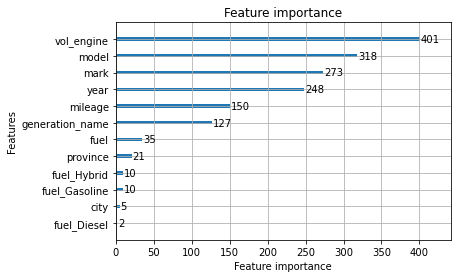

In [33]:
# Let's Plot the feature importance plot for the Model
lgb.plot_importance(gbm)
# Normal Plotting give Engine Volume , Model and Mark as the top three important features for predicting the Car Prices

In [34]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [35]:
# Let's find the Shapley Values
explainer = shap.Explainer(gbm)
shap_values = explainer(X_train_trg)

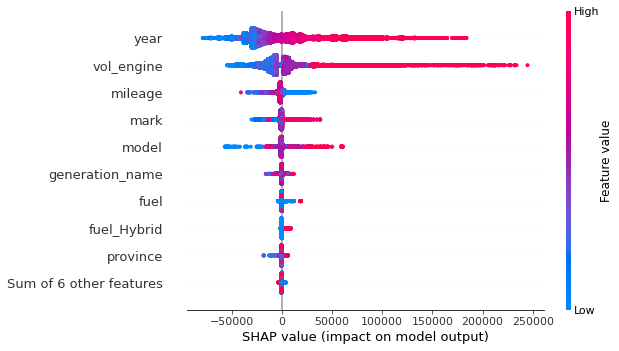

In [36]:
# Let's summarize the effects of all the features
shap.plots.beeswarm(shap_values)
# Shap Plotting give Year, Engine Volume and Mileage as the top three important features for predicting the Car Prices 

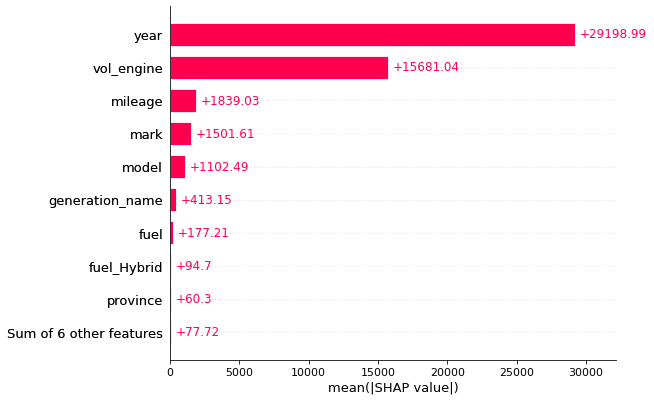

In [37]:
# Plotting the Bar Plot for the Shapley Value
shap.plots.bar(shap_values)

In [38]:
# Saving the Artifacts for Trained Model
import joblib
joblib.dump(gbm, 'lightGBM.pkl')

['lightGBM.pkl']

In [39]:
# opening the file- lightGBM
lightGBM_model = joblib.load('lightGBM.pkl') 
y_pred_pkl = lightGBM_model.predict(X_test_trg, num_iteration=gbm.best_iteration)

In [40]:
# Showing the dataframe for loaded light GBM price predictions
pd.DataFrame(y_pred_pkl,columns=['Predicted_Price'])

,Predicted_Price
0,34961.066834
1,36470.551847
2,41127.603431
3,35309.585668
4,36470.551847
...,...
35020,90007.382271
35021,85709.278377
35022,49533.936611
35023,80909.288398


In [41]:
"SBA LOANS DataSet"

'SBA LOANS DataSet'

In [42]:
import pandas as pd
data2 = pd.read_csv('SBA_loans_project_2.csv')
data2.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,BRADLEY,WV,25818,CITY NATL BK OF W. VIRGINIA,WV,0,7,1.0,0,0,1,0,N,Y,"$30,000.00",$0.00,"$30,000.00","$27,000.00",P I F
1,LA JOLLA,CA,92037,U.S. BANK NATIONAL ASSOCIATION,OH,531210,1,2.0,0,1,0,1,Y,N,"$50,000.00",$0.00,"$50,000.00","$25,000.00",P I F
2,WINSLOW,AZ,86047,SOUTHWESTERN BUS. FINANCING CO,AZ,721110,30,1.0,0,1,10465,2,0,N,"$1,297,000.00",$0.00,"$1,300,000.00","$1,300,000.00",P I F
3,OXNARD,CA,93030,CITY NATIONAL BANK,CA,0,8,1.0,0,0,1,0,N,N,"$510,000.00",$0.00,"$510,000.00","$433,500.00",P I F
4,MERIDIAN,MS,39301,TRUSTMARK NATIONAL BANK,MS,0,4,2.0,0,0,1,0,N,N,"$87,000.00",$0.00,"$87,000.00","$78,300.00",P I F


In [43]:
# Function to describe dataset
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:200].to_dict())
                
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [44]:
# Let's convert the strings styled as '$XXXX.XX' to float values
money_cols = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

for col in money_cols:
  data2[col] = [float(val[1:].replace(',', '')) for val in data2[col].values]

In [45]:
print("Data shape:", data2.shape)

Data shape: (809247, 19)


In [46]:
desc_df = describe_more(data2)
pd.set_option('display.width', 200)
desc_df.head(n=200)

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,31289,object,1,30,"{'LOS ANGELES': 10421, 'HOUSTON': 9194, 'NEW Y..."
1,State,51,object,2,3,"{'CA': 117735, 'TX': 63313, 'NY': 52031, 'FL':..."
2,Zip,32740,int64,1,5,"{90015: 843, 10001: 823, 93401: 726, 90010: 66..."
3,Bank,5699,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78119, 'WELLS F..."
4,BankState,56,object,2,3,"{'CA': 106451, 'NC': 71484, 'IL': 59292, 'OH':..."
5,NAICS,1309,int64,1,6,"{0: 181606, 722110: 25266, 722211: 17505, 8111..."
6,NoEmp,576,int64,1,4,"{1: 138747, 2: 124352, 3: 81499, 4: 66471, 5: ..."
7,NewExist,3,float64,3,3,"{1.0: 580544, 2.0: 227662, 0.0: 920}"
8,CreateJob,232,int64,1,4,"{0: 566266, 1: 56838, 2: 52098, 3: 25928, 4: 1..."
9,RetainedJob,347,int64,1,4,"{0: 396245, 1: 79902, 2: 69113, 3: 44894, 4: 3..."


In [47]:
# Let's rename the target column to Defaulted and convert the row values from string to binary
data2['MIS_Status'] = data2['MIS_Status'].replace({'CHGOFF':1,'P I F':0,})
data2 = data2.rename(columns={"MIS_Status": "Defaulted"})

In [48]:
# Let's find the Columns for NA Values in Dataset
for col in data2.columns:
    if data2[col].isna().any() == True:
        print(col)

City
State
Bank
BankState
NewExist
RevLineCr
LowDoc
Defaulted


In [49]:
# Let's process the dataset for the NA values
values_to_fill = {}
for col in data2.drop(columns=['Defaulted']).columns:
    if data2[col].isna().any() == True:
        print("Processing column and column type:", col,data2[col].dtype)
    
    if pd.api.types.is_numeric_dtype(data2[col].dtype):
        values_to_fill[col] = 0
    else:
        values_to_fill[col] = "Missing"
        

data2.fillna(value=values_to_fill,inplace=True)

Processing column and column type: City object
Processing column and column type: State object
Processing column and column type: Bank object
Processing column and column type: BankState object
Processing column and column type: NewExist float64
Processing column and column type: RevLineCr object
Processing column and column type: LowDoc object


In [50]:
# Let's find the Columns for NA Values in Dataset again
for col in data2.columns:
    if data2[col].isna().any() == True:
        print(col)

Defaulted


In [51]:
# Dropping the rows having NA values for the Defaulted column from the dataset
data2 = data2.dropna(subset = ['Defaulted'])

In [52]:
print("Data shape:", data2.shape)

Data shape: (807451, 19)


In [53]:
# Let's define the predictors and the response columns from the dataset
y = data2['Defaulted']
X = data2.drop(columns='Defaulted')

# Applying the Train and Test Split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (540992, 18)
Test shape: (266459, 18)


In [55]:
# Let's analyse the dataset for the number of unique values
len_data = len(X_train)
for col in X_train.columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  City  has  26762  values
Column  State  has  52  values
Column  Bank  has  5279  values
Column  BankState  has  55  values
Column  RevLineCr  has  14  values
Column  LowDoc  has  9  values


In [56]:
# Applying the OneHot Encoding for columns less than 10 unique values
from sklearn.preprocessing import OneHotEncoder
import numpy as np

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        if X_train[col].nunique() < 10:
            print("One-hot encoding of ", col)
            enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
            enc.fit(X_train[[col]])
            result = enc.transform(X_train[[col]])
            ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
            result_train = pd.DataFrame(result, columns=ohe_columns)
            X_train = pd.concat([X_train.reset_index(drop=True), result_train.reset_index(drop=True)], axis=1)
            '''Encode Testing'''
            result = enc.transform(X_test[[col]])
            result_test = pd.DataFrame(result, columns=ohe_columns)
            X_test = pd.concat([X_test.reset_index(drop=True), result_test.reset_index(drop=True)], axis=1)


One-hot encoding of  LowDoc


In [57]:
# Applying the Target Encoder on the training and test dataset
import category_encoders as ce

encoder = ce.TargetEncoder()

encoder.fit(X_train,y_train)
X_train_trg = encoder.transform(X_train)
X_test_trg = encoder.transform(X_test)

In [58]:
# Further cleaning the dataset
X_train_trg = X_train_trg.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test_trg = X_test_trg.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [59]:
# Logistic Regression to predict the binary result
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train_trg,y_train)
y_pred=logistic_regression.predict(X_test_trg)

In [60]:
# Let's find out the Accuracy and F1 Score 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
Accuracy_Score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('The Accuracy Score is: ', Accuracy_Score)
print('The F1 Score is: ', f1)

The Accuracy Score is:  0.8239954364461324
The F1 Score is:  0.7449707909013399


In [61]:
print(logistic_regression.coef_)
print(logistic_regression.intercept_)
print(logistic_regression.get_params())

[[-3.71294438e-07 -3.72308308e-07 -1.09544454e-05 -3.76663620e-07
  -3.78100988e-07 -7.70730904e-07 -3.01164102e-05 -2.61544790e-06
   6.14096428e-05  5.84282264e-05 -3.47852645e-06  3.27253450e-07
  -3.68949662e-07 -3.70519596e-07 -4.66375642e-07 -8.54852637e-06
   4.09768089e-06 -9.18285398e-06 -1.20612381e-08 -2.19611021e-12
   3.74748743e-09 -9.36619161e-10  2.69928789e-08 -9.73730035e-07
   5.71843152e-10  7.45898915e-09 -1.15690750e-06]]
[-2.10486639e-06]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [62]:
# Let's do the Grid Search for Hyperparameters Tuning
from sklearn.model_selection import GridSearchCV
#parameters = {'C': [1.0], 'class_weight': [None], 'dual': [False], 'fit_intercept': [True], 'intercept_scaling': [1], 'l1_ratio': [None], 'max_iter':[100], 'multi_class':['auto', 'ovr', 'multinomial'], 'n_jobs': [None], 'penalty': ['l2'], 'random_state': [None], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'tol': [0.0001], 'verbose': [0], 'warm_start': [False]}
param_grid = [    
    {'penalty': ['l1','l2'],
    'C' : [1.0],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
grid = GridSearchCV(estimator=logistic_regression, param_grid = param_grid, cv = 2, verbose = 3, n_jobs=-1).fit(X_train_trg, y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


One or more of the test scores are non-finite: [       nan        nan 0.824417          nan 0.82440406 0.82442069
 0.82454454 0.82440406 0.82440406 0.82440406        nan        nan
 0.82441145        nan 0.82440406 0.82442069 0.82441145 0.82440406
 0.82440591 0.82440406        nan        nan 0.82440775        nan
 0.82440591 0.82442069 0.82441145 0.82440406 0.82440775 0.82440591
        nan        nan 0.82443178        nan 0.82440775 0.82442069
 0.82441145 0.82440406 0.82442069 0.82440775]
newton-cg failed to converge. Increase the number of iterations.


In [63]:
# let's find the best parameters
grid.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [64]:
# New model with the best parameters
logistic_regression= LogisticRegression(C= 1.0, max_iter= 100, penalty= 'l2', solver= 'newton-cg')
logistic_regression.fit(X_train_trg,y_train)
y_pred=logistic_regression.predict(X_test_trg)

newton-cg failed to converge. Increase the number of iterations.


In [65]:
# Let's find out the Accuracy and F1 Score 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
Accuracy_Score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('The Accuracy Score is: ', Accuracy_Score)
print('The F1 Score is: ', f1)
# Our Accuracy Score increased but marginally

The Accuracy Score is:  0.8241455533496711
The F1 Score is:  0.7448950140594854


In [66]:
# Let's find the predicting probabilities
predict_proba = logistic_regression.predict_proba(X_test_trg)

In [67]:
# Let's show the prediction probabilities
Prediction_Prob = pd.DataFrame(predict_proba)
Prediction_Prob.head(10)

,0,1
0,0.728368,0.271632
1,0.723774,0.276226
2,0.724606,0.275394
3,0.915665,0.084335
4,0.882542,0.117458
5,0.734818,0.265182
6,0.910809,0.089191
7,0.968179,0.031821
8,0.915912,0.084088
9,0.854325,0.145675


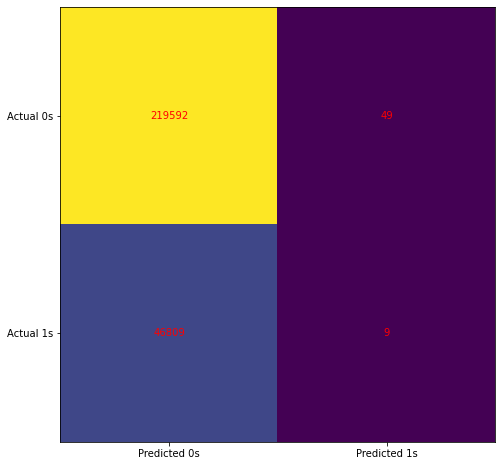

In [68]:
# Let's Plot the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, logistic_regression.predict(X_test_trg))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i, j], ha='center', va='center', color='red')
plt.show()

In [69]:
# "SECOND MODEL FOR SBA LOAN DEFAULT DATA"

In [70]:
# Let's initialize the H2O
import h2o
import numpy as np
import math
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(nthreads=-1, strict_version_check=True)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21, mixed mode)
  Starting server from C:\Users\Varish\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Varish\AppData\Local\Temp\tmp0y1fpp1s
  JVM stdout: C:\Users\Varish\AppData\Local\Temp\tmp0y1fpp1s\h2o_Varish_started_from_python.out
  JVM stderr: C:\Users\Varish\AppData\Local\Temp\tmp0y1fpp1s\h2o_Varish_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.1
H2O_cluster_version_age:,9 months and 6 days !!!
H2O_cluster_name:,H2O_from_python_Varish_pumym5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.943 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [71]:
# Let's load and describe dataset
df = h2o.import_file(path = "SBA_loans_project_2.csv")
print(df.dim)
print(df.head)
print(df.tail)
print(df.describe)
# pick a response for the supervised problem
response = 'MIS_Status'
df[response] = df[response].asfactor()    
# use all other columns (except for the response column ("MIS_Status")) as predictors
predictors = df.columns
print(predictors)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
[809247, 19]


City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
BRADLEY,WV,25818,CITY NATL BK OF W. VIRGINIA,WV,0,7,1,0,0,1,0,N,Y,"$30,000.00",0,"$30,000.00","$27,000.00",P I F
LA JOLLA,CA,92037,U.S. BANK NATIONAL ASSOCIATION,OH,531210,1,2,0,1,0,1,Y,N,"$50,000.00",0,"$50,000.00","$25,000.00",P I F
WINSLOW,AZ,86047,SOUTHWESTERN BUS. FINANCING CO,AZ,721110,30,1,0,1,10465,2,0,N,"$1,297,000.00",0,"$1,300,000.00","$1,300,000.00",P I F
OXNARD,CA,93030,CITY NATIONAL BANK,CA,0,8,1,0,0,1,0,N,N,"$510,000.00",0,"$510,000.00","$433,500.00",P I F
MERIDIAN,MS,39301,TRUSTMARK NATIONAL BANK,MS,0,4,2,0,0,1,0,N,N,"$87,000.00",0,"$87,000.00","$78,300.00",P I F
DEVILS LAKE,ND,58301,CITIZENS COMMUNITY CU,ND,453220,1,2,1,2,1,2,Y,N,"$25,000.00",0,"$25,000.00","$12,500.00",P I F
DALLAS,OR,97338,WELLS FARGO BANK NATL ASSOC,SD,234110,4,2,0,0,1,0,N,N,"$64,128.00",0,"$67,000.00","$60,300.00",P I F
Warren,NJ,7059,"TD BANK, NATIONAL ASSOCIATION",DE,722110,1,2,15,0,0,2,N,N,"$360,000.00",0,"$360,000.00","$270,000.00",P I F
HESPERIA,CA,92345,BANK OF AMERICA NATL ASSOC,NC,811111,3,1,0,3,1,1,Y,N,"$28,162.00",0,"$24,000.00","$12,000.00",P I F
LA HABRA,CA,90631,CDC SMALL BUS. FINAN CORP,CA,441120,3,1,12,0,1,1,N,N,"$289,000.00",0,"$290,000.00","$290,000.00",P I F


<bound method H2OFrame.head of >


City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
BRADLEY,WV,25818,CITY NATL BK OF W. VIRGINIA,WV,0,7,1,0,0,1,0,N,Y,"$30,000.00",0,"$30,000.00","$27,000.00",P I F
LA JOLLA,CA,92037,U.S. BANK NATIONAL ASSOCIATION,OH,531210,1,2,0,1,0,1,Y,N,"$50,000.00",0,"$50,000.00","$25,000.00",P I F
WINSLOW,AZ,86047,SOUTHWESTERN BUS. FINANCING CO,AZ,721110,30,1,0,1,10465,2,0,N,"$1,297,000.00",0,"$1,300,000.00","$1,300,000.00",P I F
OXNARD,CA,93030,CITY NATIONAL BANK,CA,0,8,1,0,0,1,0,N,N,"$510,000.00",0,"$510,000.00","$433,500.00",P I F
MERIDIAN,MS,39301,TRUSTMARK NATIONAL BANK,MS,0,4,2,0,0,1,0,N,N,"$87,000.00",0,"$87,000.00","$78,300.00",P I F
DEVILS LAKE,ND,58301,CITIZENS COMMUNITY CU,ND,453220,1,2,1,2,1,2,Y,N,"$25,000.00",0,"$25,000.00","$12,500.00",P I F
DALLAS,OR,97338,WELLS FARGO BANK NATL ASSOC,SD,234110,4,2,0,0,1,0,N,N,"$64,128.00",0,"$67,000.00","$60,300.00",P I F
Warren,NJ,7059,"TD BANK, NATIONAL ASSOCIATION",DE,722110,1,2,15,0,0,2,N,N,"$360,000.00",0,"$360,000.00","$270,000.00",P I F
HESPERIA,CA,92345,BANK OF AMERICA NATL ASSOC,NC,811111,3,1,0,3,1,1,Y,N,"$28,162.00",0,"$24,000.00","$12,000.00",P I F
LA HABRA,CA,90631,CDC SMALL BUS. FINAN CORP,CA,441120,3,1,12,0,1,1,N,N,"$289,000.00",0,"$290,000.00","$290,000.00",P I F


<bound method H2OFrame.tail of >


City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
BRADLEY,WV,25818,CITY NATL BK OF W. VIRGINIA,WV,0,7,1,0,0,1,0,N,Y,"$30,000.00",0,"$30,000.00","$27,000.00",P I F
LA JOLLA,CA,92037,U.S. BANK NATIONAL ASSOCIATION,OH,531210,1,2,0,1,0,1,Y,N,"$50,000.00",0,"$50,000.00","$25,000.00",P I F
WINSLOW,AZ,86047,SOUTHWESTERN BUS. FINANCING CO,AZ,721110,30,1,0,1,10465,2,0,N,"$1,297,000.00",0,"$1,300,000.00","$1,300,000.00",P I F
OXNARD,CA,93030,CITY NATIONAL BANK,CA,0,8,1,0,0,1,0,N,N,"$510,000.00",0,"$510,000.00","$433,500.00",P I F
MERIDIAN,MS,39301,TRUSTMARK NATIONAL BANK,MS,0,4,2,0,0,1,0,N,N,"$87,000.00",0,"$87,000.00","$78,300.00",P I F
DEVILS LAKE,ND,58301,CITIZENS COMMUNITY CU,ND,453220,1,2,1,2,1,2,Y,N,"$25,000.00",0,"$25,000.00","$12,500.00",P I F
DALLAS,OR,97338,WELLS FARGO BANK NATL ASSOC,SD,234110,4,2,0,0,1,0,N,N,"$64,128.00",0,"$67,000.00","$60,300.00",P I F
Warren,NJ,7059,"TD BANK, NATIONAL ASSOCIATION",DE,722110,1,2,15,0,0,2,N,N,"$360,000.00",0,"$360,000.00","$270,000.00",P I F
HESPERIA,CA,92345,BANK OF AMERICA NATL ASSOC,NC,811111,3,1,0,3,1,1,Y,N,"$28,162.00",0,"$24,000.00","$12,000.00",P I F
LA HABRA,CA,90631,CDC SMALL BUS. FINAN CORP,CA,441120,3,1,12,0,1,1,N,N,"$289,000.00",0,"$290,000.00","$290,000.00",P I F


<bound method H2OFrame.describe of >
['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'MIS_Status']


In [72]:
# Let's fill the NA values in the dataset
columns = ["City","State","Bank","BankState",
           "NewExist", "RevLineCr","LowDoc"]
num_col_ind = df.columns_by_type(coltype="numeric")
str_col_ind = df.columns_by_type(coltype="string")
enum_col_ind = df.columns_by_type(coltype="categorical")
all_columns = df.columns
num_col = []
str_col = []
enum_col = []

for col in columns:
    if all_columns.index(col) in num_col_ind:
        print("Fillna for numerical column:...", col)
        num_col.append(col)
        
        filled = df[col].fillna(method="forward",axis=1,maxlen=1)
        df[col] = filled
        '''Alternative way '''
        #df_h[df_h[col].isna(), col] = 0
    elif all_columns.index(col) in enum_col_ind:
        print("Fillna for categorical column:...", col)
        enum_col.append(col)
        df[col] = df[col].ascharacter()
        df[df[col].isna(), col] = "Missing"
        df[col] = df[col].asfactor()
    elif all_columns.index(col) in str_col_ind:
        print("Fillna for string column:...", col)
        str_col.append(col)
        df[df[col].isna(), col] = "Missing"

Fillna for categorical column:... City
Fillna for categorical column:... State
Fillna for categorical column:... Bank
Fillna for categorical column:... BankState
Fillna for numerical column:... NewExist
Fillna for categorical column:... RevLineCr
Fillna for categorical column:... LowDoc


In [73]:
# Choose which columns to encode
encoded_columns = enum_col + str_col + ['Zip']
response = "MIS_Status"

df[encoded_columns+[response]] = df[encoded_columns+[response]].asfactor()

In [74]:
# Let's Define the Train, Test and Valid DataFrame
train, valid, test = df.split_frame(
    ratios=[0.6,0.2], 
    seed=1234, 
    destination_frames=['train.hex','valid.hex','test.hex']
)

In [75]:
from h2o.estimators import H2OTargetEncoderEstimator

# Choose which columns to encode
encoded_columns = enum_col + str_col + ['Zip']
response = "MIS_Status"

# Train a Target Encoder model
data_te = H2OTargetEncoderEstimator(#fold_column=fold_column,
                                    data_leakage_handling=None,
                                    blending=True,
                                    inflection_point=3,
                                    smoothing=10,
                                    noise=0.15,     # In general, the less data you have the more regularization you need
                                    seed=1234)

data_te.train(x=encoded_columns,
              y=response,
              training_frame=train)

# New target encoded dataset
train_te = data_te.transform(frame=train, as_training=True)
valid_te = data_te.transform(frame=test, as_training=False)
test_te = data_te.transform(frame=valid, as_training=False)

targetencoder Model Build progress: |████████████████████████████████████████████| (done) 100%


In [76]:
# Let's Build the Model
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train_te)

## Show a detailed model summary
print(gbm)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1665005364725_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,33560.0,5.0,5.0,5.0,26.0,32.0,31.36




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11703271739747793
RMSE: 0.34210044927985395
LogLoss: 0.38009273062731247
Mean Per-Class Error: 0.4036422753667094
AUC: 0.7888563871567582
AUCPR: 0.9393146288978418
Gini: 0.5777127743135164

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5349729403330886: 


,,CHGOFF,P I F,Error,Rate
0,CHGOFF,18241.0,66761.0,0.7854,(66761.0/85002.0)
1,P I F,8749.0,391123.0,0.0219,(8749.0/399872.0)
2,Total,26990.0,457884.0,0.1557,(75510.0/484874.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.534973,0.911968,296.0
1,max f2,0.247982,0.959240,386.0
2,max f0point5,0.719591,0.890200,209.0
3,max accuracy,0.573505,0.844494,282.0
4,max precision,0.981871,1.000000,0.0
5,max recall,0.196445,1.000000,395.0
6,max specificity,0.981871,1.000000,0.0
7,max absolute_mcc,0.714353,0.373692,212.0
8,max min_per_class_accuracy,0.825912,0.712288,138.0
9,max mean_per_class_accuracy,0.808584,0.715609,151.0



Gains/Lift Table: Avg response rate: 82.47 %, avg score: 82.46 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010023,0.967744,1.210328,1.210328,0.998148,0.972389,0.998148,0.972389,0.012131,0.012131,21.032752,21.032752,0.012026
1,2,0.020044,0.963164,1.202591,1.206460,0.991768,0.965283,0.994958,0.968837,0.012051,0.024183,20.259094,20.645963,0.023606
2,3,0.030066,0.960100,1.197600,1.203507,0.987652,0.961530,0.992523,0.966401,0.012001,0.036184,19.759991,20.350659,0.034902
3,4,0.040089,0.957747,1.192862,1.200845,0.983745,0.958904,0.990328,0.964527,0.011956,0.048140,19.286247,20.084529,0.045929
4,5,0.050112,0.955813,1.187124,1.198101,0.979012,0.956731,0.988065,0.962967,0.011899,0.060039,18.712396,19.810080,0.056628
5,6,0.100230,0.947819,1.179241,1.188670,0.972511,0.951757,0.980288,0.957362,0.059101,0.119141,17.924111,18.867037,0.107870
6,7,0.150328,0.941212,1.165500,1.180949,0.961179,0.944371,0.973920,0.953033,0.058389,0.177529,16.549977,18.094864,0.155165
7,8,0.200438,0.934391,1.156728,1.174893,0.953945,0.937862,0.968926,0.949240,0.057964,0.235493,15.672789,17.489339,0.199964
8,9,0.300670,0.919200,1.137773,1.162519,0.938313,0.927219,0.958721,0.941899,0.114041,0.349534,13.777274,16.251874,0.278736
9,10,0.400873,0.897799,1.111771,1.149834,0.916869,0.909123,0.948259,0.933706,0.111403,0.460938,11.177068,14.983362,0.342623




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-10-05 16:29:39,0.013 sec,0.0,0.380230,0.464203,0.500000,0.824693,1.000000,0.175307
1,,2022-10-05 16:29:41,2.595 sec,1.0,0.375244,0.451868,0.738041,0.920675,1.175834,0.163812
2,,2022-10-05 16:29:42,3.873 sec,2.0,0.371318,0.442887,0.744192,0.922923,1.183173,0.163841
3,,2022-10-05 16:29:43,4.151 sec,3.0,0.368378,0.436159,0.747556,0.924185,1.182707,0.162593
4,,2022-10-05 16:29:47,8.172 sec,39.0,0.343818,0.383701,0.784206,0.937561,1.207833,0.156868
5,,2022-10-05 16:29:48,9.694 sec,50.0,0.342100,0.380093,0.788856,0.939315,1.210328,0.155731



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,BankState,17740.484375,1.000000,0.265684
1,UrbanRural,15778.896484,0.889429,0.236307
2,Bank,11959.155273,0.674117,0.179102
3,State,6609.090332,0.372543,0.098979
4,RevLineCr,6196.505859,0.349286,0.092800
5,NAICS,2698.713867,0.152122,0.040416
6,DisbursementGross,1567.771851,0.088373,0.023479
7,NoEmp,1539.346924,0.086770,0.023053
8,GrAppv,541.459290,0.030521,0.008109
9,SBA_Appv,521.375732,0.029389,0.007808


In [77]:
## Get the AUC on the validation set
perf = gbm.model_performance(valid_te)
print('The AUC Value is: ',perf.auc())

The AUC Value is:  0.7807053422243452


In [78]:
## rbind() makes a copy here, so it's better to use split_frame with `ratios = c(0.8)` instead above
cv_gbm = H2OGradientBoostingEstimator(nfolds = 4, seed = 0xDECAF)
cv_gbm.train(x = predictors, y = response, training_frame = train_te.rbind(valid_te))

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1665005364725_10


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,34077.0,5.0,5.0,5.0,27.0,32.0,31.28




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11719618358629326
RMSE: 0.3423392813953626
LogLoss: 0.380758638175417
Mean Per-Class Error: 0.40372496078069287
AUC: 0.7871498144826827
AUCPR: 0.9385422236340982
Gini: 0.5742996289653655

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.539149775039795: 


,,CHGOFF,P I F,Error,Rate
0,CHGOFF,24305.0,88907.0,0.7853,(88907.0/113212.0)
1,P I F,11795.0,521056.0,0.0221,(11795.0/532851.0)
2,Total,36100.0,609963.0,0.1559,(100702.0/646063.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.539150,0.911882,301.0
1,max f2,0.230680,0.959246,393.0
2,max f0point5,0.715369,0.889596,217.0
3,max accuracy,0.564010,0.844596,291.0
4,max precision,0.983723,1.000000,0.0
5,max recall,0.185872,1.000000,397.0
6,max specificity,0.983723,1.000000,0.0
7,max absolute_mcc,0.715369,0.370014,217.0
8,max min_per_class_accuracy,0.827127,0.712287,141.0
9,max mean_per_class_accuracy,0.811446,0.714189,153.0



Gains/Lift Table: Avg response rate: 82.48 %, avg score: 82.47 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010022,0.967250,1.209656,1.209656,0.997683,0.971989,0.997683,0.971989,0.012123,0.012123,20.965585,20.965585,0.011991
1,2,0.020044,0.962818,1.201791,1.205724,0.991197,0.964875,0.994440,0.968432,0.012045,0.024168,20.179121,20.572353,0.023532
2,3,0.030067,0.959740,1.193178,1.201542,0.984093,0.961269,0.990991,0.966044,0.011958,0.036126,19.317757,20.154154,0.034581
3,4,0.040089,0.957306,1.192803,1.199357,0.983784,0.958502,0.989189,0.964158,0.011955,0.048081,19.280306,19.935692,0.045608
4,5,0.050189,0.955390,1.183291,1.196124,0.975939,0.956294,0.986523,0.962576,0.011951,0.060032,18.329117,19.612395,0.056172
5,6,0.100221,0.947651,1.177393,1.186773,0.971074,0.951370,0.978810,0.956982,0.058908,0.118939,17.739305,18.677311,0.106821
6,7,0.150331,0.940943,1.164302,1.179283,0.960277,0.944272,0.972633,0.952745,0.058343,0.177282,16.430163,17.928269,0.153804
7,8,0.200443,0.934030,1.158275,1.174031,0.955306,0.937539,0.968301,0.948944,0.058044,0.235327,15.827524,17.403063,0.199067
8,9,0.300661,0.918731,1.135949,1.161337,0.936893,0.926431,0.957832,0.941439,0.113842,0.349169,13.594943,16.133722,0.276818
9,10,0.400896,0.898335,1.110593,1.148650,0.915979,0.909013,0.947368,0.933332,0.111320,0.460489,11.059275,14.864973,0.340078




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.11809158770982865
RMSE: 0.3436445659541682
LogLoss: 0.38356658665866694
Mean Per-Class Error: 0.4094111139927252
AUC: 0.7817375324535021
AUCPR: 0.9364452662126646
Gini: 0.5634750649070042

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5308008048741292: 


,,CHGOFF,P I F,Error,Rate
0,CHGOFF,22903.0,90309.0,0.7977,(90309.0/113212.0)
1,P I F,11256.0,521595.0,0.0211,(11256.0/532851.0)
2,Total,34159.0,611904.0,0.1572,(101565.0/646063.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.530801,0.911278,298.0
1,max f2,0.182947,0.959243,396.0
2,max f0point5,0.712537,0.888603,214.0
3,max accuracy,0.566157,0.843326,284.0
4,max precision,0.980851,1.000000,0.0
5,max recall,0.128446,1.000000,398.0
6,max specificity,0.980851,1.000000,0.0
7,max absolute_mcc,0.701488,0.364799,220.0
8,max min_per_class_accuracy,0.827203,0.707213,138.0
9,max mean_per_class_accuracy,0.806914,0.710039,154.0



Gains/Lift Table: Avg response rate: 82.48 %, avg score: 82.47 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010024,0.967277,1.209282,1.209282,0.997375,0.971888,0.997375,0.971888,0.012122,0.012122,20.928183,20.928183,0.011971
1,2,0.020032,0.962852,1.199714,1.204501,0.989483,0.964840,0.993432,0.968367,0.012007,0.024129,19.971370,20.450147,0.023378
2,3,0.030037,0.959787,1.191081,1.200031,0.982364,0.961244,0.989745,0.965994,0.011917,0.036046,19.108145,20.003136,0.034288
3,4,0.040043,0.957269,1.188643,1.197186,0.980353,0.958460,0.987399,0.964112,0.011893,0.047938,18.864302,19.718581,0.045059
4,5,0.050051,0.955325,1.182837,1.194317,0.975564,0.956271,0.985032,0.962544,0.011838,0.059777,18.283746,19.431667,0.055501
5,6,0.100122,0.947377,1.172885,1.183599,0.967356,0.951216,0.976192,0.956879,0.058727,0.118504,17.288498,18.359867,0.104901
6,7,0.150153,0.940604,1.163813,1.177006,0.959874,0.943948,0.970755,0.952570,0.058226,0.176730,16.381302,17.700611,0.151671
7,8,0.200171,0.933777,1.151157,1.170547,0.949435,0.937223,0.965428,0.948735,0.057579,0.234309,15.115667,17.054690,0.194817
8,9,0.300248,0.918675,1.134473,1.158523,0.935675,0.926449,0.955511,0.941307,0.113535,0.347844,13.447281,15.852288,0.271615
9,10,0.400345,0.898595,1.107715,1.145820,0.913606,0.909128,0.945033,0.933261,0.110879,0.458723,10.771523,14.581959,0.333144




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.842956,0.001975,0.841539,0.841014,0.845012,0.844258
1,auc,0.781754,0.002247,0.778565,0.781967,0.783745,0.782739
2,err,0.157044,0.001975,0.158461,0.158986,0.154988,0.155742
3,err_count,25365.000000,307.204600,25598.000000,25650.000000,25024.000000,25188.000000
4,f0point5,0.875375,0.001586,0.873357,0.874865,0.876746,0.876532
5,f1,0.911307,0.001221,0.910783,0.909861,0.912581,0.912003
6,f2,0.950318,0.001766,0.951560,0.947775,0.951470,0.950467
7,lift_top_group,1.209476,0.003470,1.208909,1.214166,1.209043,1.205785
8,logloss,0.383567,0.002581,0.385433,0.386057,0.380747,0.382032
9,max_per_class_error,0.793793,0.013893,0.813506,0.781745,0.792778,0.787142



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-10-05 16:30:32,41.589 sec,0.0,0.380167,0.464089,0.500000,0.824766,1.000000,0.175234
1,,2022-10-05 16:30:32,41.834 sec,1.0,0.375227,0.451869,0.736552,0.920377,1.174875,0.163863
2,,2022-10-05 16:30:32,42.039 sec,2.0,0.371332,0.442967,0.741542,0.922297,1.183002,0.163826
3,,2022-10-05 16:30:33,42.269 sec,3.0,0.368454,0.436370,0.745687,0.923699,1.183074,0.162614
4,,2022-10-05 16:30:33,42.494 sec,4.0,0.365618,0.430294,0.748152,0.924427,1.183201,0.162147
5,,2022-10-05 16:30:33,42.743 sec,5.0,0.363316,0.425421,0.749208,0.924860,1.184592,0.161655
6,,2022-10-05 16:30:33,43.013 sec,6.0,0.361356,0.421159,0.752335,0.925866,1.186183,0.161576
7,,2022-10-05 16:30:34,43.336 sec,7.0,0.359826,0.417818,0.753527,0.926178,1.186002,0.161625
8,,2022-10-05 16:30:34,43.659 sec,8.0,0.358191,0.414348,0.756411,0.927342,1.186404,0.161631
9,,2022-10-05 16:30:34,43.971 sec,9.0,0.356962,0.411764,0.757105,0.927436,1.186404,0.162006



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,BankState,22843.328125,1.000000,0.258362
1,UrbanRural,20807.226562,0.910867,0.235334
2,Bank,16431.884766,0.719330,0.185848
3,State,8571.000977,0.375208,0.096940
4,RevLineCr,8419.323242,0.368568,0.095224
5,NAICS,3681.386963,0.161158,0.041637
6,NoEmp,2118.245117,0.092729,0.023958
7,DisbursementGross,1759.631714,0.077030,0.019902
8,SBA_Appv,994.674744,0.043543,0.011250
9,NewExist,643.144836,0.028155,0.007274


In [79]:
# Let's show a detailed summary of the cross validation metrics
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()

# Full summary of all metrics
print(cv_summary) 



                                     mean          sd    cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid
0                  accuracy      0.842956    0.001975      0.841539      0.841014      0.845012      0.844258
1                       auc      0.781754    0.002247      0.778565      0.781967      0.783745      0.782739
2                       err      0.157044    0.001975      0.158461      0.158986      0.154988      0.155742
3                 err_count  25365.000000  307.204600  25598.000000  25650.000000  25024.000000  25188.000000
4                  f0point5      0.875375    0.001586      0.873357      0.874865      0.876746      0.876532
5                        f1      0.911307    0.001221      0.910783      0.909861      0.912581      0.912003
6                        f2      0.950318    0.001766      0.951560      0.947775      0.951470      0.950467
7            lift_top_group      1.209476    0.003470      1.208909      1.214166      1.209043      1.205785
8         

In [80]:
# Let's get the cross-validated AUC by scoring the combined holdout predictions.
perf_cv = cv_gbm.model_performance(test)
print('The AUC Value is: ',perf_cv.auc())

The AUC Value is:  0.7856009775969004


In [81]:
# GBM hyperparameters
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)
gbm_grid2.train(x = predictors, y = response, training_frame = train)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      col_sample_rate  learn_rate  max_depth  sample_rate           model_ids   logloss
0                 0.5        0.10        9.0          1.0   gbm_grid2_model_7  0.343598
1                 0.9        0.09        9.0          0.6   gbm_grid2_model_3  0.349170
2                 0.9        0.09        8.0          0.9  gbm_grid2_model_36  0.356454
3                 0.8        0.06        9.0          0.6  gbm_grid2_model_30  0.359481
4                 0.9        0.03       10.0          0.5  gbm_grid2_model_21  0.370211
5                 0.8        0.03        9.0          0.9   gbm_grid2_model_8  0.376852
6                 0.4        0.08        6.0          0.9  gbm_grid2_model_28  0.377865
7                 0.5        0.05        7.0          0.9   gbm_grid2_model_2  0.378674
8                 0.3        0.03        8.0          1.0   gbm_grid2_model_5  0.387324
9                 0.5    

In [82]:
# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2

      col_sample_rate  learn_rate  max_depth  sample_rate           model_ids       auc
0                 0.5        0.10        9.0          1.0   gbm_grid2_model_7  0.844500
1                 0.9        0.09        9.0          0.6   gbm_grid2_model_3  0.836430
2                 0.9        0.09        8.0          0.9  gbm_grid2_model_36  0.825810
3                 0.8        0.06        9.0          0.6  gbm_grid2_model_30  0.824203
4                 0.9        0.03       10.0          0.5  gbm_grid2_model_21  0.821579
5                 0.5        0.01       10.0          1.0  gbm_grid2_model_24  0.810637
6                 0.8        0.03        9.0          0.9   gbm_grid2_model_8  0.809127
7                 0.2        0.02       10.0          0.5  gbm_grid2_model_25  0.804293
8                 0.6        0.01        9.0          0.8  gbm_grid2_model_11  0.797815
9                 0.5        0.05        7.0          0.9   gbm_grid2_model_2  0.795602
10                0.3        0.0

In [83]:
# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]

In [84]:
# Now let's evaluate the model performance on a train set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test_te)
print('The AUC Value is now: ',best_gbm_perf2.auc())
# Thus our AUC value increased with Hyperparameters tunning for Train dataset

The AUC Value is now:  0.8076424120861672


In [85]:
# Let's plot the confusion matrix for the H2O GBM 
best_gbm2.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5489448222561871: 


,,CHGOFF,P I F,Error,Rate
0,CHGOFF,28062.0,56940.0,0.6699,(56940.0/85002.0)
1,P I F,12175.0,387697.0,0.0304,(12175.0/399872.0)
2,Total,40237.0,444637.0,0.1425,(69115.0/484874.0)


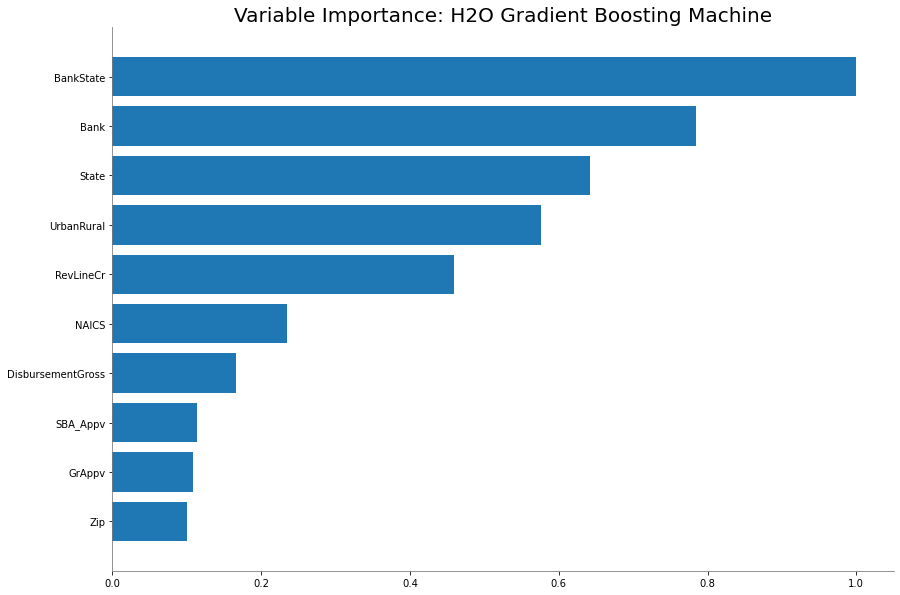

<Figure size 432x288 with 0 Axes>

In [86]:
# let's plot the H2O GBM for important features
best_gbm2.varimp_plot()

In [87]:
# Function to get the shapley values
def examine_all_reason_codes(data, model, alpha=1):
    
    shap_contribs = model.predict_contributions(data)
    
    col_mapping = {}
    for i in data.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    
    #Convert to Pandas DF
    X = data.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.summary_plot(shap_contribs[shap_cols].values, 
                             X[shap_cols].values,
                             feature_names=shap_cols,
                             alpha=alpha,
                             plot_size=(10,10)
                            )

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


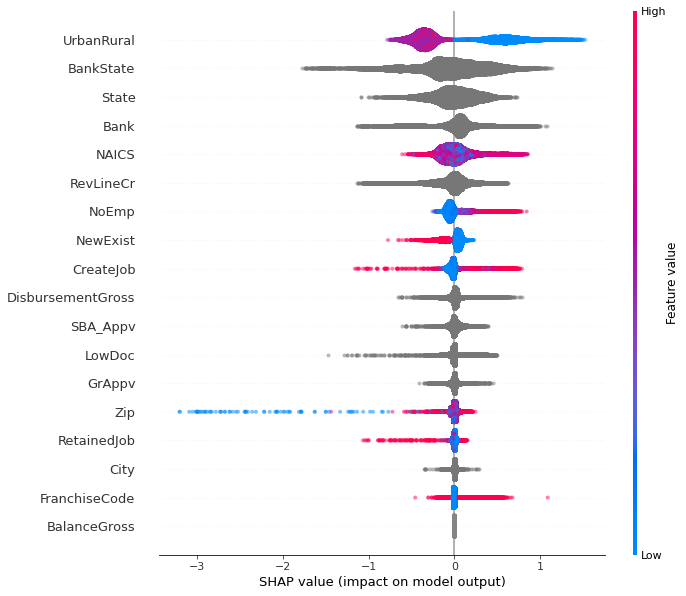

In [88]:
# Showing the shapley values
examine_all_reason_codes(test_te, best_gbm2,alpha=0.5)
# Shapley values reflects the UrbanRural feature as the most important feature while predicting a default

In [89]:
# Saving the Artifacts for Trained Model
model_h2o = h2o.save_model(model=best_gbm2, force=True)

In [90]:
# load the model
saved_model = h2o.load_model(model_h2o)

In [91]:
# download the model built above to your local machine
my_local_model = h2o.download_model(saved_model)

In [92]:
# upload the model that you just downloded above
# to the H2O cluster
uploaded_model = h2o.upload_model(my_local_model)

In [93]:
# let's test the uploaded model performance
gbm_perf = uploaded_model.model_performance(test_te)
print('The AUC Value is now: ',gbm_perf.auc())

The AUC Value is now:  0.8076424120861672
